In [2]:
# import  library
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [3]:
# import data set
data1=pd.read_csv("diabetes.csv")

In [4]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Understand mean, min, max, 
data1.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Check Nulls or Zeroes values  (Medical data often has 0s as missing)
(data1 == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [45]:
data=data1['Age'].min()
data

np.int64(21)

In [44]:
data=data1['Age'].max()
data

np.int64(81)

/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_5692/1274105136.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data1.groupby('Age_Group')['BMI'].mean().reset_index()
/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_5692/1274105136.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Age_Group', y='BMI', palette='Set2')


TypeError: 'str' object is not callable

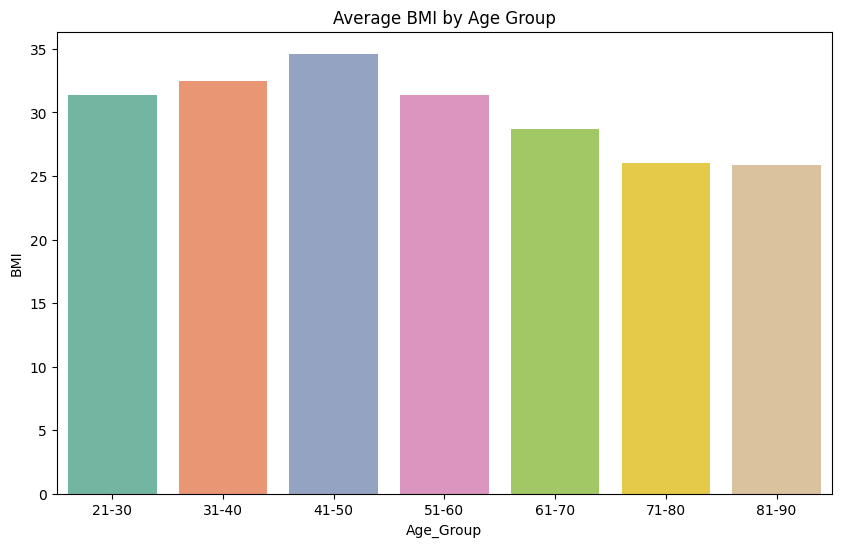

In [48]:
 
#   Create age bins
bins = [20, 30, 40, 50, 60, 70, 80,90]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90']

data1['Age_Group'] = pd.cut(data1['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate average BMI per age group
grouped_data = data1.groupby('Age_Group')['BMI'].mean().reset_index()

# Step 3: Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Age_Group', y='BMI', palette='Set2')
plt.title("Average BMI by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average BMI")
plt.tight_layout()
plt.show()



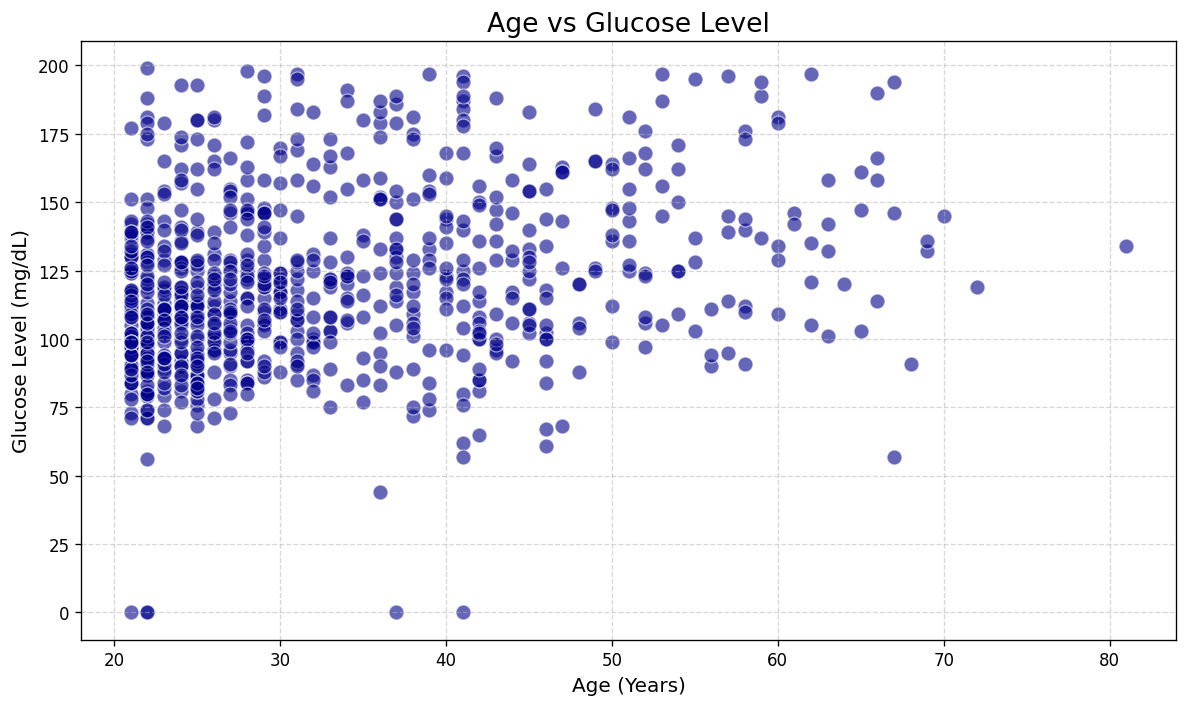

In [8]:
# scatterplot draw 
plt.figure(figsize=(10, 6), dpi=120)
sns.scatterplot(data=data1, x='Age', y='Glucose', color='darkblue', alpha=0.6, edgecolor='white', s=80)
plt.title('Age vs Glucose Level', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Glucose Level (mg/dL)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
#Compare Averages for Diabetic vs Non-Diabetic
# first grouped 
grouped = data1.groupby('Outcome').mean(numeric_only=True)


In [19]:
grouped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


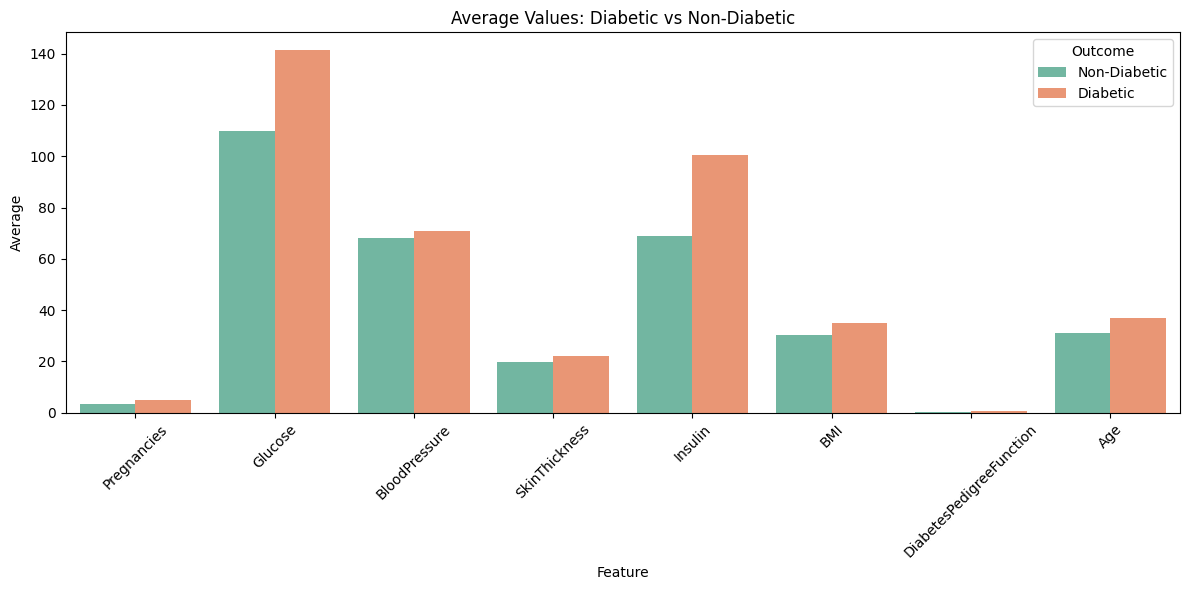

In [31]:
  
# Transpose so columns become index for better plotting
grouped_T = grouped.T.reset_index()
grouped_T.columns = ['Feature', 'Non-Diabetic', 'Diabetic']

# Melt to long format for seaborn barplot
grouped_melted = grouped_T.melt(id_vars='Feature', var_name='Outcome', value_name='Average')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_melted, x='Feature', y='Average', hue='Outcome', palette='Set2')
plt.title('Average Values: Diabetic vs Non-Diabetic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


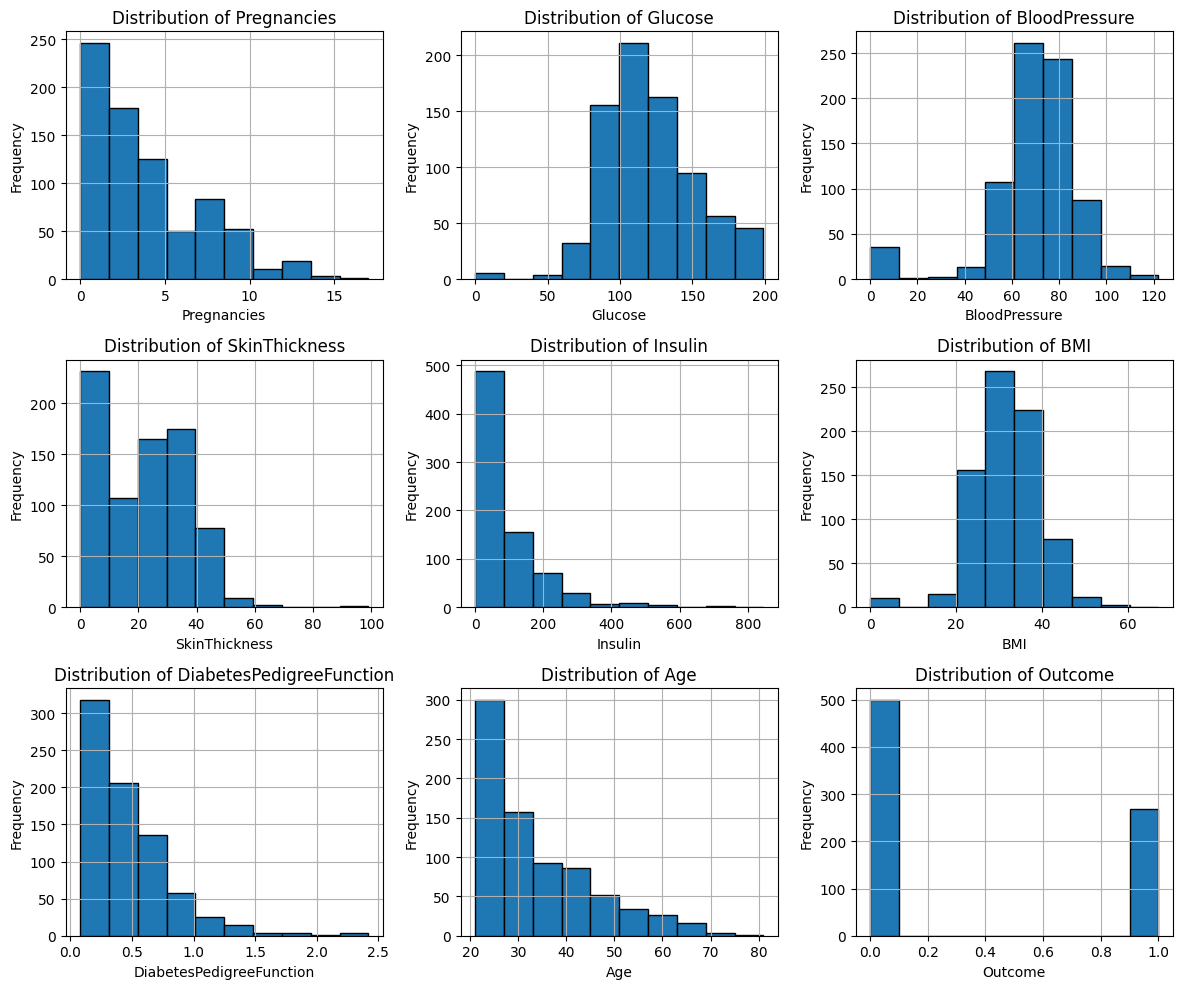

In [29]:

# Create histogram subplots for each numeric column
axes = data1.hist(figsize=(12, 10), edgecolor='black')

# Loop through each subplot to set labels
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())  # x-axis label = feature name
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {ax.get_title()}")

plt.tight_layout()
plt.show()
 

